### Deteccion de Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/cleanned_data/df.tfm')

In [3]:
df.head()

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,TUTELA,28332.0,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475.0,ASESORAMIENTO FINANCIERO,14204.0,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000.0,ASESORAMIENTO FINANCIERO,14219.0,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [4]:
# Convierto variables a object
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [5]:
df.dtypes

cliente                object
saldo_captacion       float64
esta_carterizado       object
cliente_bbp            object
tipo_gestor            object
gestor                 object
cartera_patron         object
codigo_cartera         object
digital_3_meses        object
camino_digital         object
saldo_financiacion    float64
saldo_ffii            float64
saldo_plp             float64
lp_dom_ingresos         int64
lp_tjta_cto             int64
lp_tjt_rev              int64
lp_rbos                 int64
lp_of_int               int64
marca_bp               object
marca_ccte             object
edad                  float64
seg_valor              object
seg_recorrido          object
dz                     object
oficina                object
lp_seg_vida             int64
lp_seg_acc              int64
lp_seg_salud            int64
lp_seg_hogar            int64
lp_seg_auto             int64
dtype: object

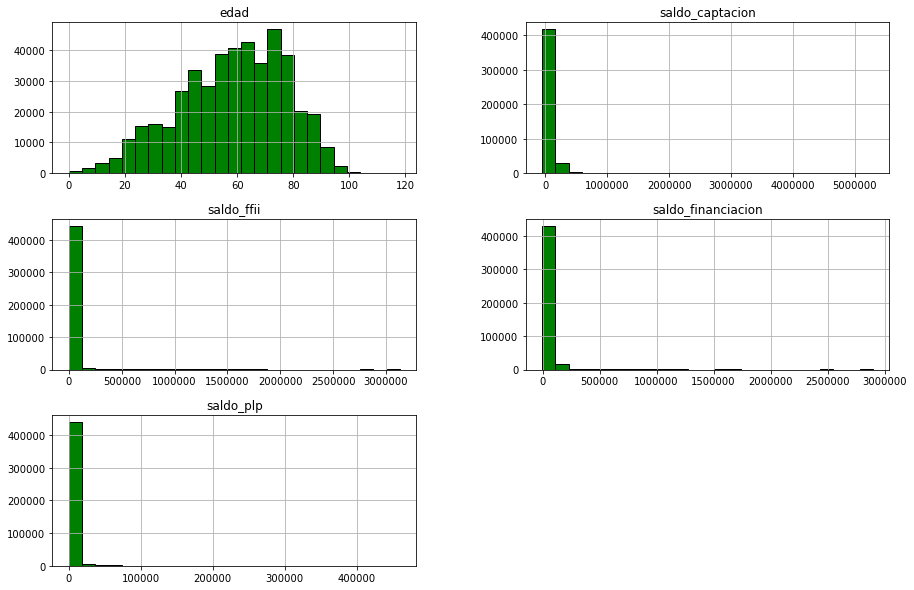

In [6]:
# Histograma de variables que no estan etiquetadas y que pueden tener outlier
df[['saldo_captacion','saldo_financiacion','saldo_ffii',
    'saldo_plp','edad']].hist(figsize=(15,10), color = 'G', bins = 25,edgecolor = 'black', linewidth = 1)
plt.show()

In [ ]:
    ,'saldo_financiacion','saldo_ffii',
    'saldo_plp','edad']])

Boxplot Saldo_Captacion


<function matplotlib.pyplot.show(*args, **kw)>

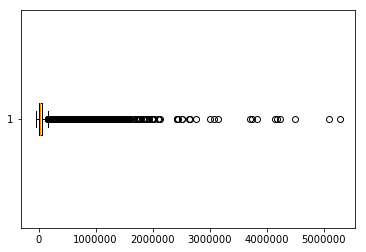

In [10]:
print ('Boxplot Saldo_Captacion')
plt.boxplot(df['saldo_captacion'],vert = False)
plt.show               

In [27]:
print ('Cuartiles Saldo_captacion')
print('='*30)
Q1 = df['saldo_captacion'].quantile(0.25)
print ('Primer cuartil',Q1)
print('='*30)
Q3 = df['saldo_captacion'].quantile(0.75)
print ('Tercer cuartil',Q3)
print('='*30)
rangointercuartil = (Q3 - Q1)
print ('Rango_intercuartil',rangointercuartil)
print('='*30)
mediana = df['saldo_captacion'].median()
print ('Mediana', mediana)
print('='*30)
minimo = df['saldo_captacion'].min()
print ('Minimo', minimo)
print('='*30)
maximo = df['saldo_captacion'].max()
print ('Maximo', maximo)

Cuartiles Saldo_captacion
Primer cuartil 1813.1825
Tercer cuartil 64469.63999999999
Rango_intercuartil 62656.45749999999
Mediana 15208.279999999999
Minimo -51043.32
Maximo 5290215.76


In [33]:
print('='*30)
bigote_inferior = Q1 - 1.5 * rangointercuartil
print ('bigote_inferior', bigote_inferior)
print('='*30)
bigote_superior = Q3 + 1.5 * rangointercuartil
print ('bigote_superior', bigote_superior)
print('='*30)

bigote_inferior -92171.50374999999
bigote_superior 158454.32624999998


In [37]:
ubicacion_outliers = (df['saldo_captacion'] < bigote_inferior) | (df['saldo_captacion'] > bigote_superior)
#print ('ubicacion_outliers',ubicacion_outliers)

In [38]:
outlier = saldo_captacion[ubicacion_outliers]
print ('lista_outliers',outlier)

NameError: name 'saldo_captacion' is not defined

Boxplot saldo_financiacion


<function matplotlib.pyplot.show(*args, **kw)>

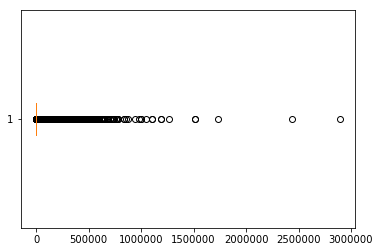

In [11]:
print ('Boxplot saldo_financiacion')
plt.boxplot(df['saldo_financiacion'],vert = False)
plt.show

Boxplot saldo_ffii


<function matplotlib.pyplot.show(*args, **kw)>

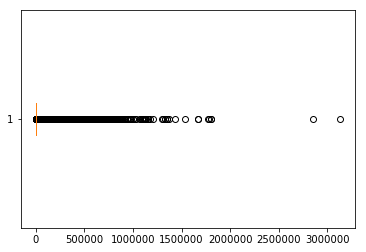

In [12]:
print ('Boxplot saldo_ffii')
plt.boxplot(df['saldo_ffii'],vert = False)
plt.show

Boxplot saldo_plp


<function matplotlib.pyplot.show(*args, **kw)>

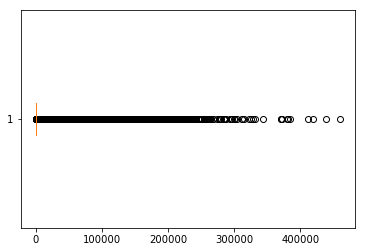

In [13]:
print ('Boxplot saldo_plp')
plt.boxplot(df['saldo_plp'],vert = False)
plt.show

Boxplot edad


<function matplotlib.pyplot.show(*args, **kw)>

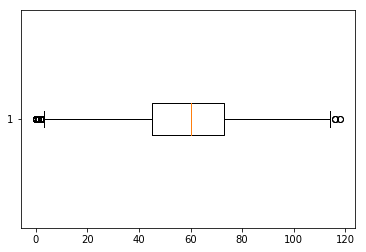

In [14]:
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False)
plt.show